**Applying GANs for Image Generation & Unsupervised Learning:**

Generative Adversarial Networks (GANs) are powerful unsupervised learning models used for image generation, data augmentation, and anomaly detection.

They consist of two networks:

* Generator (G) – Creates fake images from random noise.
* Discriminator (D) – Differentiates between real and fake images.

These two networks compete with each other in a zero-sum game, improving over time.

**Steps to Implement GAN for Image Generation:**

* Load the dataset (e.g., MNIST, CelebA, CIFAR-10).
* Build the Generator (CNN-based network to generate images).
* Build the Discriminator (CNN-based network to classify images as real or fake).
* Train using Adversarial Loss (Minimax game).
* Generate New Images after training.

In [1]:
from keras.datasets import cifar10
(trainX, trainy), (testX,testy) = cifar10.load_data()
print("Train", trainX.shape, trainy.shape)
print("Test", testX.shape, testy.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


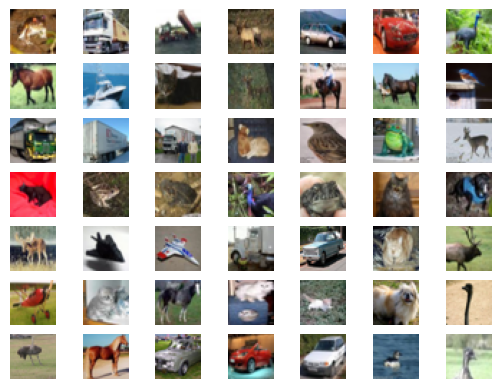

In [2]:
from matplotlib import pyplot
for i in range(49):
  pyplot.subplot(7,7,1+i)
  pyplot.axis('off')
  pyplot.imshow(trainX[i])
pyplot.show()

In [3]:
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import numpy as np

In [4]:
def define_discriminator(in_shape = (32,32,3)):
  model = Sequential()
  model.add(Conv2D(64,(3,3), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128,(3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128,(3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(256,(3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation = 'sigmoid'))
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

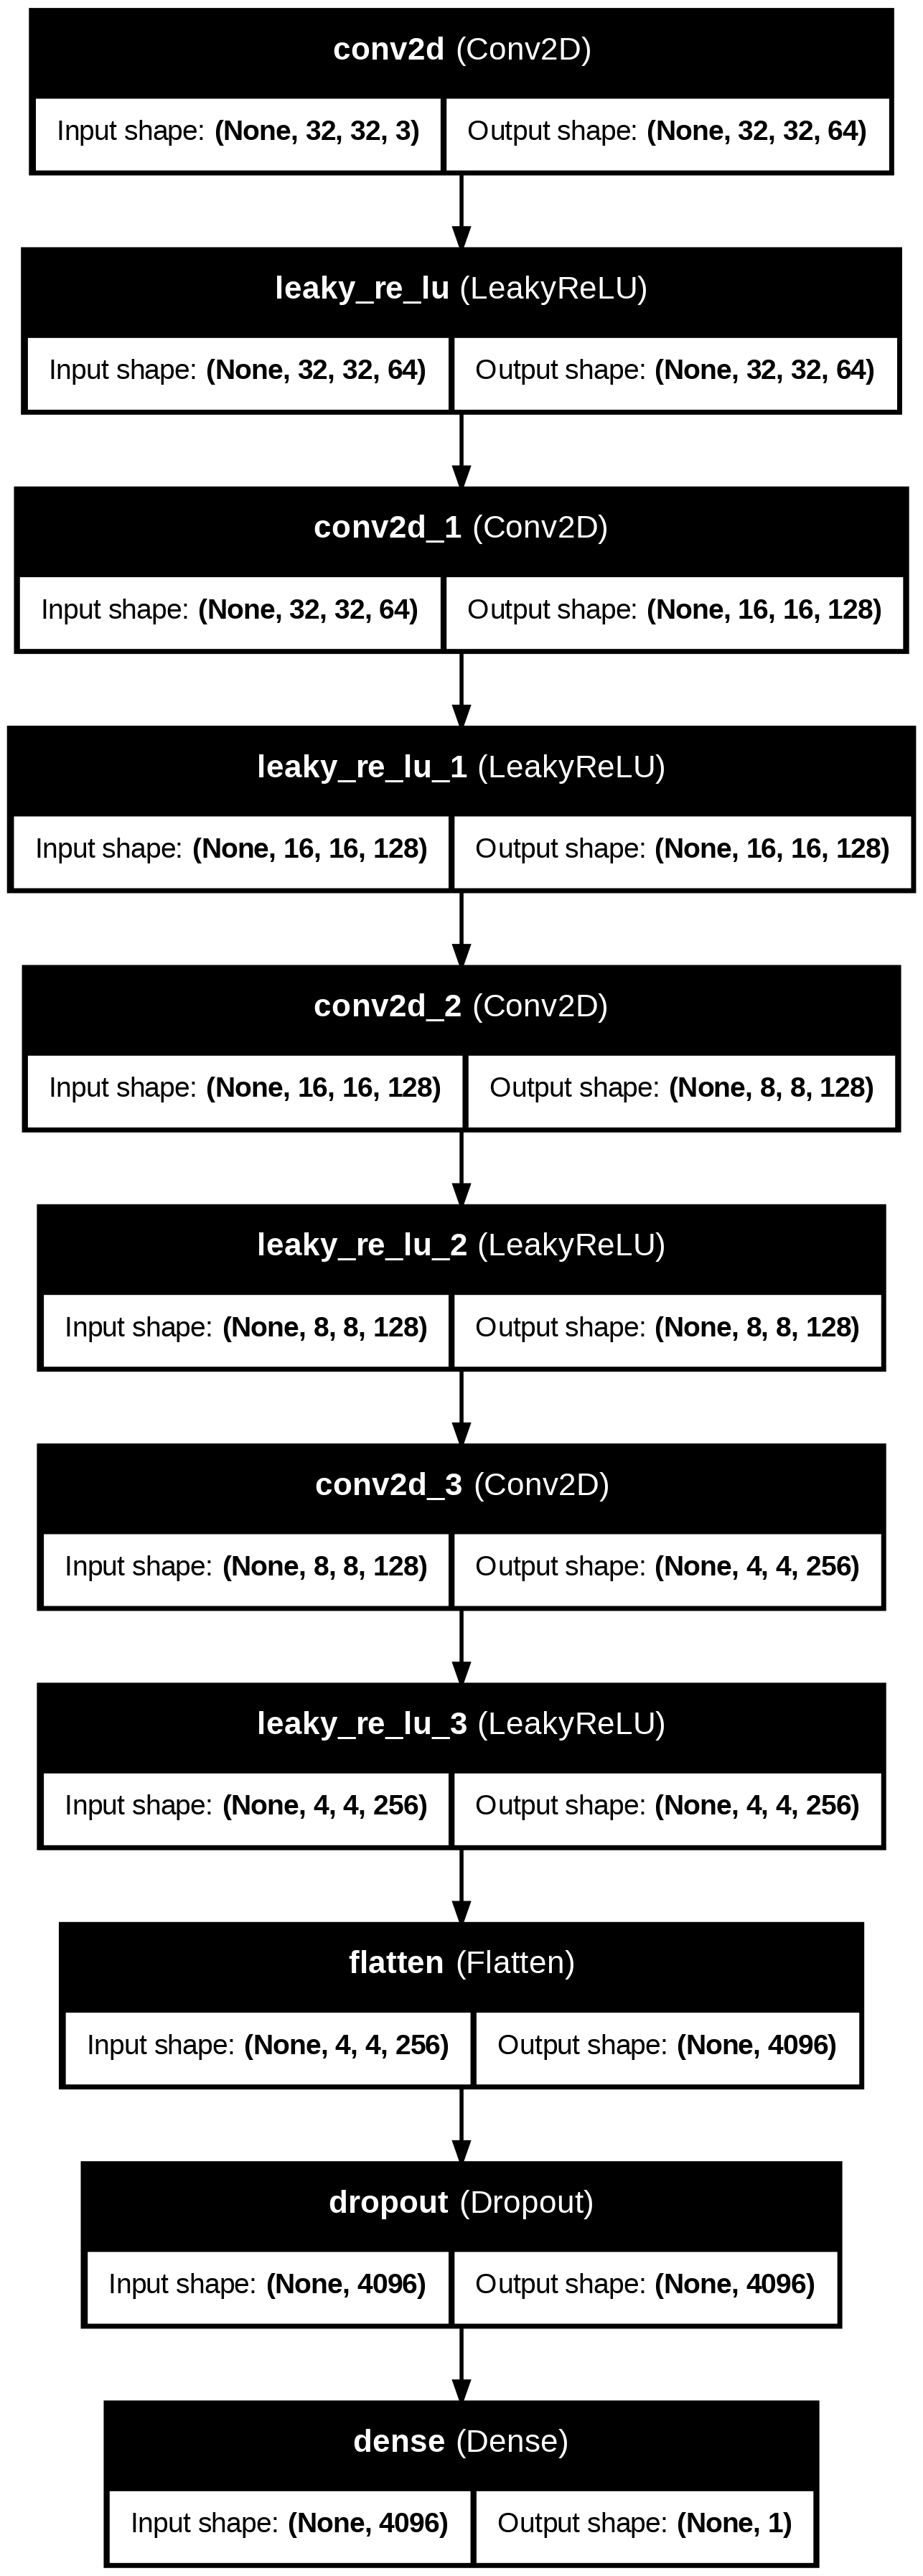

In [5]:
model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plt.png', show_shapes=True, show_layer_names=True)

In [6]:
def load_real_samples():
  (trainX, _), (_,_) = cifar10.load_data()
  X = trainX.astype('float32')
  X = (X - 127.5)/127.5
  return X

In [7]:
X = load_real_samples()
X.shape

(50000, 32, 32, 3)

In [8]:
X[0] #Now the values are between -1 and 1

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [9]:
def generate_real_samples(dataset, n_samples):
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  X = dataset[ix]
  y = np.ones((n_samples, 1))
  return X,y

In [10]:
X,y = generate_real_samples(X, 64)
print(X.shape)
print(y.shape)
print(X)
print(y)

(64, 32, 32, 3)
(64, 1)
[[[[-0.79607844 -0.81960785 -0.44313726]
   [-0.8509804  -0.7490196  -0.4117647 ]
   [-0.79607844 -0.73333335 -0.40392157]
   ...
   [ 0.7176471   0.9137255   0.8745098 ]
   [ 0.70980394  0.88235295  0.78039217]
   [ 0.6392157   0.827451    0.92941177]]

  [[-0.8039216  -0.8352941  -0.48235294]
   [-0.8509804  -0.7490196  -0.4117647 ]
   [-0.8039216  -0.7254902  -0.3882353 ]
   ...
   [ 0.70980394  0.88235295  0.8509804 ]
   [ 0.7019608   0.85882354  0.75686276]
   [ 0.64705884  0.8117647   0.8901961 ]]

  [[-0.8039216  -0.8509804  -0.5137255 ]
   [-0.8509804  -0.7490196  -0.41960785]
   [-0.8039216  -0.7254902  -0.3647059 ]
   ...
   [ 0.70980394  0.85882354  0.8352941 ]
   [ 0.7019608   0.827451    0.7490196 ]
   [ 0.654902    0.8039216   0.84313726]]

  ...

  [[ 0.24705882  0.09803922 -0.15294118]
   [ 0.09019608 -0.05882353 -0.28627452]
   [-0.01176471 -0.16862746 -0.3647059 ]
   ...
   [ 0.27058825  0.24705882  0.14509805]
   [ 0.23137255  0.23921569  0.12

In [11]:
def generate_fake_samples(n_samples):
  X = np.random.rand(32*32*3*n_samples)
  X = -1+X*2
  X = X.reshape((n_samples, 32, 32, 3))
  y = np.zeros((n_samples, 1))
  return X,y

In [12]:
X,y = generate_fake_samples(64)
print(X.shape)
print(y.shape)
print(X)
print(y)

(64, 32, 32, 3)
(64, 1)
[[[[ 0.9893505   0.97893191 -0.68012428]
   [-0.44214082 -0.54363914  0.5172377 ]
   [ 0.5889122  -0.9044267   0.24284311]
   ...
   [ 0.00889485 -0.22885257  0.22814082]
   [-0.21646843 -0.69533218 -0.6607111 ]
   [ 0.49425826  0.48593966  0.06687572]]

  [[-0.28188171  0.31373818  0.57306009]
   [-0.087051   -0.81228205 -0.3436327 ]
   [-0.87952012 -0.15686701 -0.85435735]
   ...
   [-0.85894127 -0.45585254 -0.4010299 ]
   [ 0.46501196  0.23384711 -0.76510498]
   [ 0.36294019 -0.68928369  0.11549849]]

  [[ 0.04910284  0.48433664 -0.421179  ]
   [-0.27006162 -0.52300442 -0.51186867]
   [ 0.03254926  0.63237299 -0.62909155]
   ...
   [-0.60975121  0.64226812 -0.43672393]
   [-0.60077512  0.40462966 -0.5442182 ]
   [-0.66294732  0.38303651 -0.56057222]]

  ...

  [[ 0.81356052 -0.07319691  0.80121875]
   [ 0.41273512 -0.40223859 -0.83220059]
   [-0.05173474 -0.01268691 -0.40860293]
   ...
   [-0.04967429 -0.97277928  0.71791465]
   [ 0.49293727 -0.54794201 -0.66

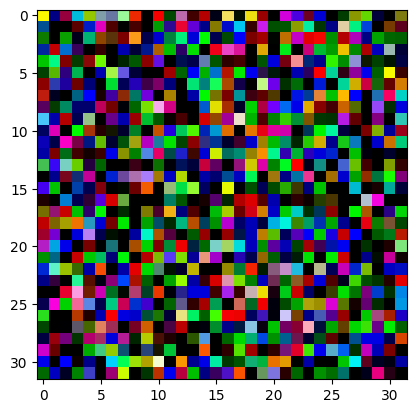

In [13]:
pyplot.imshow(X[0])

In [14]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
  half_batch = int(n_batch / 2)
  for i in range(n_iter):
    X_real, y_real = generate_real_samples(dataset, half_batch)
    _, real_acc = model.train_on_batch(X_real, y_real)
    X_fake, y_fake = generate_fake_samples(half_batch)
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    print('>%d Real=%.0f%% Fake=%.of%%' %(i+1, real_acc*100, fake_acc*100))

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model

In [16]:
def define_generator(latent_dim):
  model = Sequential()
  n_nodes = 256 * 4 * 4
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4, 4, 256)))
  model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(3,(3,3), activation='tanh', padding='same'))
  return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

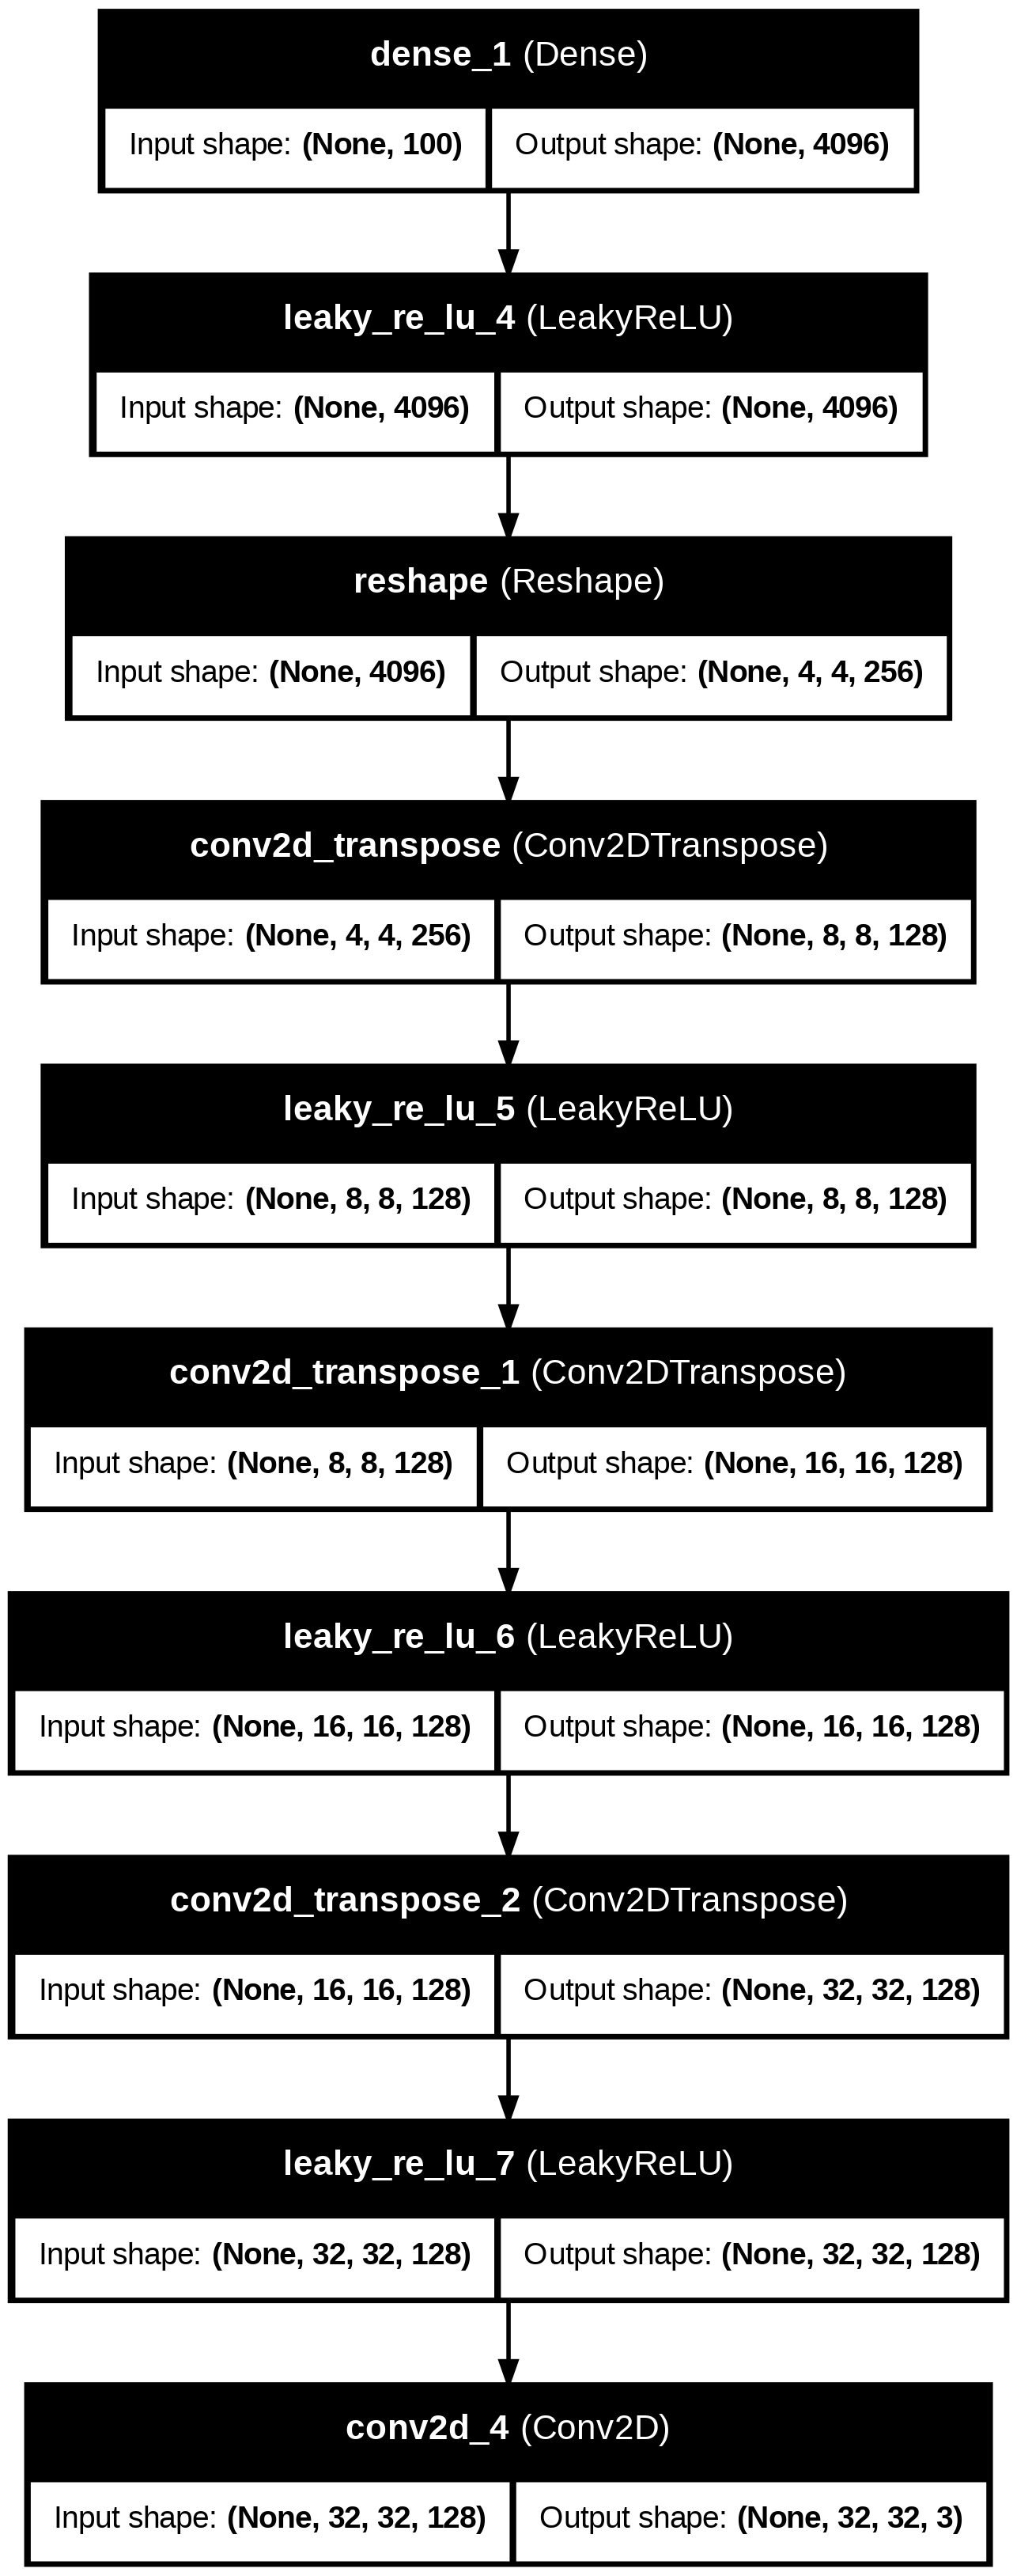

In [17]:
latent_dim= 100#100
model = define_generator(latent_dim)
model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
def generate_latent_points(latent_dim, n_samples):
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input